In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
img = cv2.imread("/content/gettyimages-476996143.jpeg",0)

In [ ]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [ ]:
face = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=1, minSize=(10, 10)
)

In [ ]:
for (x,y,w,h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

(-0.5, 299.5, 167.5, -0.5)

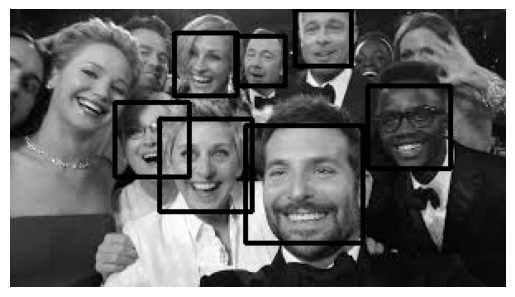

In [ ]:
plt.imshow(img,cmap='gray')
plt.axis('off')

In [1]:
!unzip '/content/Face Images.zip'

Archive:  /content/Face Images.zip
   creating: Face Images/Final Testing Images/
   creating: Face Images/Final Testing Images/face1/
  inflating: Face Images/Final Testing Images/face1/1face1.jpg  
  inflating: Face Images/Final Testing Images/face1/2face1.jpg  
  inflating: Face Images/Final Testing Images/face1/3face1.jpg  
  inflating: Face Images/Final Testing Images/face1/4face1.jpg  
   creating: Face Images/Final Testing Images/face10/
  inflating: Face Images/Final Testing Images/face10/1face10.jpg  
  inflating: Face Images/Final Testing Images/face10/2face10.jpg  
  inflating: Face Images/Final Testing Images/face10/3face10.jpg  
  inflating: Face Images/Final Testing Images/face10/4face10.jpg  
   creating: Face Images/Final Testing Images/face11/
  inflating: Face Images/Final Testing Images/face11/1face11.jpg  
  inflating: Face Images/Final Testing Images/face11/2face11.jpg  
  inflating: Face Images/Final Testing Images/face11/3face11.jpg  
  inflating: Face Images/Fin

In [2]:
trainingImagePath = '/content/Face Images/Final Training Images'
testImagePath = '/content/Face Images/Final Testing Images'

In [6]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [8]:
training_set = train_datagen.flow_from_directory(
        trainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 261 images belonging to 17 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
        testImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 68 images belonging to 17 classes.


In [10]:
test_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15,
 'shwetha': 16}

In [11]:
TrainClasses=training_set.class_indices

ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

print("Mapping of Face and its ID",ResultMap)
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9', 16: 'shwetha'}

 The Number of output neurons:  17


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(OutputNeurons, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

model.fit(
    training_set,
    steps_per_epoch=8,
    epochs=20,
    validation_data=test_set,
    validation_steps=10
)

Epoch 1/20
8/8 [==============================] - 4s 311ms/step - loss: 2.2711 - accuracy: 0.3231
Epoch 2/20
8/8 [==============================] - 4s 477ms/step - loss: 2.3164 - accuracy: 0.6157
Epoch 3/20
8/8 [==============================] - 3s 300ms/step - loss: 2.1763 - accuracy: 0.3537
Epoch 4/20
8/8 [==============================] - 3s 310ms/step - loss: 2.0754 - accuracy: 0.4105
Epoch 5/20
8/8 [==============================] - 4s 533ms/step - loss: 1.6108 - accuracy: 0.5371
Epoch 6/20
8/8 [==============================] - 3s 284ms/step - loss: 1.3749 - accuracy: 0.5677
Epoch 7/20
8/8 [==============================] - 3s 346ms/step - loss: 2.1528 - accuracy: 0.3281
Epoch 8/20
8/8 [==============================] - 4s 473ms/step - loss: 1.7751 - accuracy: 0.4760
Epoch 9/20
8/8 [==============================] - 3s 332ms/step - loss: 1.4085 - accuracy: 0.5625
Epoch 10/20
8/8 [==============================] - 3s 301ms/step - loss: 1.0235 - accuracy: 0.6638
Epoch 11/20
8/8 [==

In [24]:
ImagePath='/content/Face Images/Final Testing Images/shwetha/test3.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

Text(0.5, 1.0, 'Prediction is: shwetha')

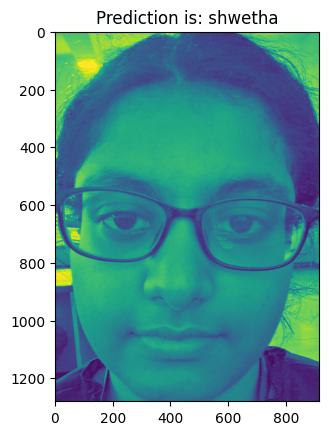

In [25]:
result=model.predict(test_image,verbose=0)
plt.imshow(cv2.imread(ImagePath,0))
plt.title(f'Prediction is: {ResultMap[np.argmax(result)]}')